This notebook is definitely a work in progress.However, currently, this notebook includes how I determined the political affliation of the bots, and looked at what hashtags they were using

I should point out as well that these are suspected bots (15 + tweets about Kathy Griffin with 95%+ being retweets) and some nonbots may be in here as well. The main idea of this portion of my project was try to get a glimpse of just how many bots there are and what they are doing.

In [1]:
import pandas as pd
#import gensim
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
pd.set_option('max_colwidth',1000)
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk import pos_tag


In [3]:
bots = pd.read_pickle("finalbots.pkl")

In [4]:
bots.head()

,index,_id,coordinates,created_at,entities,favorite_count,favorited,followers_counts,friends_count,geo,...,num_statuses,retweet_count,retweeted,screen_name,source,text,user_desc,user_loc,verified,created
20,786782,5938d2a31e931e05bab6a5d3,None,Tue May 30 17:54:20 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'TMZ', 'name': 'TMZ', 'id': 16331010, 'id_str': '16331010', 'indices': [96, 100]}], 'urls': [{'url': 'https://t.co/RLzHGykKhK', 'expanded_url': 'http://www.tmz.com/2017/05/30/kathy-griffin-beheads-donald-trump-photo-tyler-shields', 'display_url': 'tmz.com/2017/05/30/kat…', 'indices': [67, 90]}]}",0,False,1518,1091,None,...,947463,0,False,auldcove,"<a href=""http://www.apple.com"" rel=""nofollow"">iOS</a>",Kathy Griffin Beheads Donald Trump in Shocking Photo Shoot (PHOTO)\nhttps://t.co/RLzHGykKhK\n\nvia @TMZ,,auldcove scotland,False,2017-05-30 13:54:20
25,786777,5938d2a31e931e05bab6a5ce,None,Tue May 30 17:55:50 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'TMZ', 'name': 'TMZ', 'id': 16331010, 'id_str': '16331010', 'indices': [71, 75]}], 'urls': [{'url': 'https://t.co/IjLOdI0lR4', 'expanded_url': 'http://www.tmz.com/2017/05/30/kathy-griffin-beheads-donald-trump-photo-tyler-shields', 'display_url': 'tmz.com/2017/05/30/kat…', 'indices': [107, 130]}]}",1,False,244,529,None,...,2508,1,False,LouiseClaudeRST,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Kathy Griffin Beheads Donald Trump in Shocking Photo Shoot (PHOTO) via @TMZ Does this mean we are free no? https://t.co/IjLOdI0lR4,SECRETLY SOURCED QUEEN OF ALL POLITICAL SOURCES ACCORDING TO MY SOURCES.(just PARODY fun in tense political climate. RT ME OR YOU HATE KITTENS&PUPPIES!,"Washington, DC",False,2017-05-30 13:55:50
29,786773,5938d2a31e931e05bab6a5ca,None,Tue May 30 17:56:09 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/cvMHUku26G', 'expanded_url': 'http://www.tmz.com/2017/05/30/kathy-griffin-beheads-donald-trump-photo-tyler-shields', 'display_url': 'tmz.com/2017/05/30/kat…', 'indices': [113, 136]}]}",1,False,75,182,None,...,837,0,False,mizzknowitalltv,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Kathy Griffin Beheads Donald Trump in Shocking Photo Shoot We need to boycott Kathy Griffin this is unacceptable https://t.co/cvMHUku26G,"Blogger- Mizz Know It All TV focuses commentary on the latest news, gossip, controversial topics, entertainment news and holding the media responsible",,False,2017-05-30 13:56:09
33,786769,5938d2a31e931e05bab6a5c6,None,Tue May 30 17:56:46 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'FBI', 'name': 'FBI', 'id': 17629860, 'id_str': '17629860', 'indices': [0, 4]}, {'screen_name': 'FBILosAngeles', 'name': 'FBI LosAngeles', 'id': 349137313, 'id_str': '349137313', 'indices': [5, 19]}, {'screen_name': 'SecretService', 'name': 'U.S. Secret Service', 'id': 115749048, 'id_str': '115749048', 'indices': [20, 34]}], 'urls': [{'url': 'https://t.co/oKSwEtIexT', 'expanded_url': 'http://www.tmz.com/2017/05/30/kathy-griffin-beheads-donald-trump-photo-tyler-shields', 'display_url': 'tmz.com/2017/05/30/kat…', 'indices': [116, 139]}]}",4,False,4828,5109,None,...,13725,6,False,JimChilds10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@FBI @FBILosAngeles @SecretService is this ok by you all? If the laws have changed please let the rest of us know! https://t.co/oKSwEtIexT,👆🏻That's My Brother! I need your help! I live in Texas & I'm going to run for Congress in '18. It's time to put real Americans in DC! We need others! JOIN ME!,TEXAS,False,2017-05-30 13:56:46
37,786765,5938d2a31e931e05bab6a5c2,None,Tue May 30 17:57:14 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yUnOQDumey', 'expanded_url': 'http://www.tmz.com/2017/05/30/kathy-griffin-beheads-dona

Let's which hashtags the bots are using:

In [5]:
hashtags = []
for x in bots.entities.values:
    if x["hashtags"]:
        for y in x["hashtags"]:
            hashtags.append(y["text"])
hashtags = [x.lower() for x in hashtags]

In [6]:
Counter(hashtags).most_common(50)

[('kathygriffin', 21008),
 ('maga', 14261),
 ('trump', 8394),
 ('tcot', 4722),
 ('fakenews', 4571),
 ('covfefe', 4321),
 ('sethrich', 3949),
 ('cnnisisis', 2821),
 ('retweet', 2805),
 ('cnn', 2317),
 ('hannity', 1988),
 ('trumptrain', 1941),
 ('lockherup', 1853),
 ('flashbackfriday', 1828),
 ('kathygriffinhatecrime', 1732),
 ('kathy_griffin', 1573),
 ('rats', 1301),
 ('tucker', 1274),
 ('stopthescalpings', 1263),
 ('wednesdaywisdom', 1175),
 ('arrestkathygriffin', 927),
 ('apologynotaccepted', 892),
 ('boycottkathygriffin', 811),
 ('trumpusa', 810),
 ('projection', 801),
 ('periscope', 784),
 ('infowars', 780),
 ('ccot', 761),
 ('dumped', 726),
 ('alexjonesshow', 714),
 ('stillfired', 680),
 ('saturdaymorning', 678),
 ('stopthebeheadings', 662),
 ('tlot', 616),
 ('kathy', 609),
 ('fired', 586),
 ('resistance', 550),
 ('fullretard', 549),
 ('griffin', 541),
 ('isis', 537),
 ('thefive', 492),
 ('boycottcnn', 471),
 ('breaking', 453),
 ('potus', 450),
 ('kathgriffin', 429),
 ('p2', 403),


Whoa! Almost all the top hashtags (except kathygriffin) seem to be hashtags we expect from conservatives.

In [7]:
urls = []
for x in bots.entities:
    if x["urls"]:
        urls.append(x["urls"][0]["expanded_url"])

In [8]:
Counter(urls).most_common(20)

[('http://www.dailywire.com/news/16998/disgusting-kathy-griffin-holds-trumps-bloody-hank-berrien',
  6267),
 ('http://www.vulture.com/2016/12/kathy-griffin-comedy-should-go-hard-on-trump.html',
  4837),
 ('https://twitter.com/kathygriffin/status/5249479639', 3527),
 ('http://www.theamericanmirror.com/satan-worshipers-disavow-kathy-griffin-grotesque-trump-behead/',
  3438),
 ('http://dailycaller.com/2017/05/30/should-cnn-snatch-kathy-griffin-off-its-new-years-eve-special/',
  2764),
 ('http://fxn.ws/2sdskCg', 2393),
 ('http://www.tmz.com/2017/05/30/kathy-griffin-beheads-donald-trump-photo-tyler-shields/',
  2209),
 ('http://ow.ly/LPgx30caKRp', 2048),
 ('http://www.thegatewaypundit.com/2017/05/comedienne-roseanne-barr-kathy-griffin-slap-fck-btch/',
  1877),
 ('http://fxn.ws/2rl1Ezx', 1860),
 ('https://www.google.com/amp/amp.tmz.com/2017/06/02/kathy-griffin-concert-canceled-trump',
  1805),
 ('http://www.tmz.com/2017/06/02/kathy-griffin-concert-canceled-trump/', 1644),
 ('http://www.thega

Links seem to be mostly conservative too..

(array([ 736480.,  736481.,  736482.,  736483.,  736484.,  736485.]),
 <a list of 6 Text xticklabel objects>)

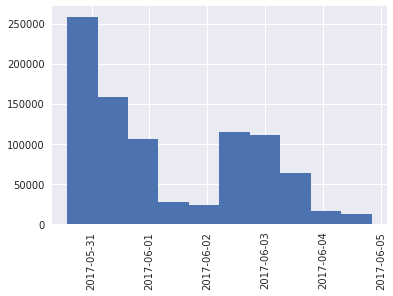

In [10]:
bots.created.hist()
plt.xticks(rotation=90)

Most bot tweets seem to be in the first 2 days.